# 1.1 Подготовка и анализ изначальных данных

Перед обучением модели тщательно изучим и подготовим изначальные данные.
Выполнив следующие этапы:  
1) до разметку и переразметку изображений, чтобы улучшить качество аннотаций
2) Анализ представленной разметки
3) разделение данных на обучающие и тестовые наборы для оценки производительности модели.

В предоставленном нам датасете есть 3 папки:
- test
- train
- valid
Как видим данные уже поделили до нас на 3 выборки

Классы:

0 - name (наименование товара)

1 - old_price (старая цена)

2 - price (цена)

3 - promotion (акция)

## Разархивирование данных

Для начала данные надо разархивировать для удобства работы с ними

In [ ]:
import zipfile

def unzip(file, path): # функция для разархивирования
    with zipfile.ZipFile(file, 'r') as zip_file:
        zip_file.extractall(path)
# file - путь от куда
# path - путь куда

In [ ]:
unzip('Data.zip', 'A')

## Проверка корректности разметки

Так как есть фотографии без ценников, различие в кол-ве файлов разметки и фото будет сильно отличаться

Чтобы заполнить данные разметки мной был выбран атрибут Yolo-Annotation-Tool. Он достаточно прост в использовании и соответсвует данной нам формату разметки в предоставленных данных.

Чтобы запустить данную утилиту требуется запустить файл Annotate.html в папке YOLO-Annotation-Tool

Проверяем кол-во всех файлов в разархивированных изначальных данных

In [ ]:
from pathlib import Path

path_back = Path('A/Data/object/labels')
print('Кол-во файлов разметки изначально: ', sum(1 for x in path_back.rglob('*') if x.is_file()))

Во время проверки разметки и заполнения пропусков мною были найдены данные неправильной разметки, а именно, как ценник были отмечены упаковки и другая информация.

In [ ]:
from pathlib import Path

path_back = Path('A/Data/object/images')
print('Кол-во картинок после удаления лишних ', sum(1 for x in path_back.rglob('*') if x.is_file()))

# 1.2 Подбор алгоритма обучения

## Обоснование выбранного алгоритма

### YOLOv5

Предобученная модель YOLOv5  используется для задач обнаружения, сегментации, детекции. Использует достаточно малое кол-во памяти, но возвращает отличный результат, также тут имеет место скорость обучения. Данная модель проcта для понимания и использования. 

Все эти параметры указаны в весах обученной модели. 

Было скачено две категории весов yolov5n и yolov5s. Первые имеет 1.9M параметров, то есть нагрузка на ЦП достаточно маленькая, но тогда мы теряем качество. Вторые имеют 7.2М параметров, сильнее нагружет ЦП, но при этом возвращает лучший результат, при том что время используемое для обучения на маленьких данных разнится не сильно.

Оба этих файла отлично подходят для обнаружения объектов, но какой лучше с данными нам характеристиками ПК пока не известно, во время обучения модели будет произведено сравнение результатов, скорости и нагрузки на память и использование лучшего по сравнению.

В связи с тем что у нас ограниченное время на обучение и достаточно скудные характеристики ПК подходящие для обучения нейронной сети, было решено использовать веса yolov5n, так как для её обучения требуется меньшее количество времени

Пример работы YOLOv5:
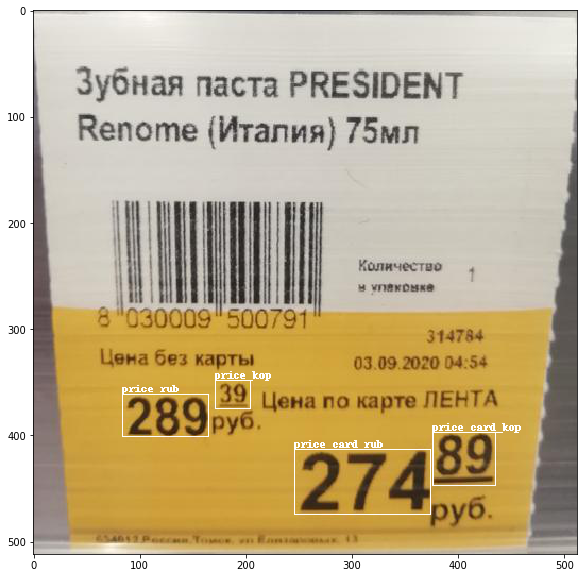

### Easy OCR

Преобученная модель на разных языках мира, предназначенная для считывания текта с картинок. Отлично считывает текст и цифры с картинок под углом, в перспективе, ну а также отлично считывает текст с хороших фото, под прямым углом и в хорошем качестве.

## Подбор параметров

### YOLOv5

#### Параметры командной строки

В ***запуске обучения есть следующие доп. параметры***, каждый отвечает за свою конкретную задачу:

[-h] 

[--weights WEIGHTS]

[--cfg CFG] 

[--data DATA] 

[--hyp HYP]

[--epochs EPOCHS] 

[--batch-size BATCH_SIZE] 

[--imgsz IMGSZ]

[--rect] 

[--resume [RESUME]] 

[--nosave]

[--noval]

[--noautoanchor] 

[--noplots] 

[--evolve [EVOLVE]]

[--evolve_population EVOLVE_POPULATION]

[--resume_evolve RESUME_EVOLVE] 

[--bucket BUCKET]

[--cache [CACHE]] 

[--image-weights] 

[--device DEVICE]

[--multi-scale] 

[--single-cls] 

[--optimizer {SGD,Adam,AdamW}]

[--sync-bn] 

[--workers WORKERS] 

[--project PROJECT]

[--name NAME] 

[--exist-ok] 

[--quad] 

[--cos-lr]

[--label-smoothing LABEL_SMOOTHING]

[--patience PATIENCE]

[--freeze FREEZE [FREEZE ...]] 

[--save-period SAVE_PERIOD]

[--seed SEED] 

[--local_rank LOCAL_RANK] 

[--entity ENTITY]

[--upload_dataset [UPLOAD_DATASET]]

[--bbox_interval BBOX_INTERVAL]

[--artifact_alias ARTIFACT_ALIAS] 

[--ndjson-console]

[--ndjson-file]

В нашем случае мы будем самые главне параметры (чтобы не нагружать память), а именно:
1. --weiights - является параметром, который хранит в себе путь до весов модели
2. --epochs - является параметров, который хранит в себе количество эпох обучения
3. --data - является параметров, который хранит в себе путь до нашего файла yaml, который хранит информацию о хранении фотографий и разметки
4. --batch-size - размер батча 

Данные параметров будут следующие:
1. параметры которые не будут изменяться:
    1. --weights C:/Users/Participant/Desktop/yolov5n.pt - дают избежать переобучения, каждый раз мы будем использовать стандартные веса
    2. --data C:/Users/Participant/Desktop/yolov5/datasets/data.yaml - наши данные не изменяются, соответственно данный параметр является неизменным
2. параметры, которые будут подбираться в ходе обучения:
    1. --epochs 5 - так как у нас ограниченное кол-во ресурсов, начинаем с самого малого, после посмотрев на результат будем изменять
    2. --batch-size 2 - так как у нас ограниченное кол-во ресурсов, начинаем с самого малого, после посмотрев результат будем изменять

#### Гиперпараметры

Также есть ***гиперпараметры*** в самой модели, такие как (все эти параметры являются данными из весов модели,  при обучении на наших данных они будут оптимизироваться под наш датасет):

0mlr0=0.01, 

lrf=0.01, 

momentum=0.937, 

weight_decay=0.0005, 

warmup_epochs=3.0, 

warmup_momentum=0.8,

warmup_bias_lr=0.1, 

box=0.05, 

cls=0.5, 

cls_pw=1.0, 

obj=1.0, 

obj_pw=1.0,

iou_t=0.2, 

anchor_t=4.0, 

fl_gamma=0.0, 

hsv_h=0.015, 

hsv_s=0.7, 

hsv_v=0.4, 

degrees=0.0, 

translate=0.1, 

scale=0.5, 

shear=0.0, 

perspective=0.0, 

flipud=0.0, 

fliplr=0.5, 

mosaic=1.0, 

mixup=0.0, 

copy_paste=0.0

#### Общее кол-во параметров во всех слоях

Также есть ***общие параметры*** в слоях модели, в первом файле (yolov5n) 1.9 М параметров, во втором (yolov5s) 7.2 M параметров

### Easy OCR

Данная библиотека для распознавания текста имеет след. параметры (через "=" указано значение по умолчанию):

lang_list, 

gpu=True, 

model_storage_directory=None,

user_network_directory=None,

detect_network="craft", 

recog_network='standard', 

download_enabled=True, 

detector=True, 

recognizer=True, 

verbose=True, 

quantize=True, 

cudnn_benchmark=False

В нашем случае м будем использовать только первый параметр (lang_list), который является параметром содержащим путь до фотографии с которой надо считать текст. В него будет записан путь до фотографии, которая получилась в ходе пропуска через модль обнаружения и обрезанная для более удобного считывания текста

# 1.3 Импорт данных для обучения нейронной сети

## Импорт данных (фотографии)

### YOLOv5

Для импорта фотографий в нашу модель следует использовать файл yaml, с путями до наших обучающих данных (требуются для обучения модели) и валидационных данных (требуются для проверки модели в ходе обучения (есть ли переобучение или нет? Если результат на валидационных данных ухудшается, а на обучающих увеличивается, значит модель переобучилась (запомнила наш датасет)))

***Структура файла формата yaml***

> train: 'A/Data/images/train' - путь до обучающих данных
>
> val: 'A/Data/images/val' - путь до валидацонных данных
>
> nc: 1 - количество классов
>
> path: 'C:/Users/Participant/Desktop/A/' - путь до "корневой" папки
>
> names: ['name', 'old_price', 'price', 'promotion'] - названия классов

### Easy OCR

Так как данная модель является уже обученной на том ж алфавите, что и предоставленные нам данные, импорт данных для неё не требуется, ***так как уже обученная на тех же данных***.

## Импорт разметки

### YOLOv5

Для импорта фотографий в нашу модель следует использовать файл yaml, с путями до наших обучающих данных (требуются для обучения модели) и валидационных данных (требуются для проверки модели в ходе обучения (есть ли переобучение или нет? Если результат на валидационных данных ухудшается, а на обучающих увеличивается, значит модель переобучилась (запомнила наш датасет)))

### Easy OCR

Следуя из пункта выше (Импорт данных (фотографии) - Easy OCR), данной модели не требуется данных для обучения, ***так как они же были использованы для её обучения***.

## Проверка импорта на ошибки

Для проверки импорта на ошибки требуется запустить нашу модель для обучения с минимальными требованиями.

In [ ]:
!python C:/Users/Participant/Desktop/yolov5/train.py  --weights C:/Users/Participant/Desktop/yolov5n.pt --epochs 1 --data C:/Users/Participant/Desktop/yolov5/datasets/data.yaml --batch-size 2

***Ошибок в ходе обучения не возникло значит данные импортируются корректно.***

# 1.4 Обучение нейронной сети

## Использование заранее подготовленных данных

Во время выполнения выше стоящих пунктов, был произведён импорт данных в модель, для последующего её обучения (см. Подбор алгоритма обучения -> Импорт данных)

## Использование выбранного алгоритма обучения нейронной сети

### YOLOv5

Для ***использования ранее выбранного алгоритма*** требуется команда в командной строке, которая будет содержать путь до весов нашей предобученной модели, кол-во эпох, количество батчей, путь до файла хранящего данные, а также путь до файла train.py, который отвечает за само обучение.

Начинаем с epochs = 2 и batch-size = 2. Позже данные параметры будем менять

In [ ]:
!python C:/Users/Participant/Desktop/yolov5/train.py  --weights C:/Users/Participant/Desktop/yolov5n.pt --epochs 2 --data C:/Users/Participant/Desktop/yolov5/datasets/data.yaml --batch-size 2

Так как обучение занимало достаточно много времени, было принято решение его остановить и попробовать поменять параметры

Поменяли параметры batch-size

In [ ]:
!python C:/Users/Participant/Desktop/yolov5/train.py  --weights C:/Users/Participant/Desktop/yolov5n.pt --epochs 2 --data C:/Users/Participant/Desktop/yolov5/datasets/data.yaml --batch-size 20

Обучение было выполнено через терминал для отслеживания результатов в режиме реального времени и возможности параллельной работы.

*здесь может быть скриншот обучения модели*

### Easy OCR

Для работы с данным алгоритмом следует импортировать библиотеку для работы с ней, а в ней забрать тот класс, благодаря которому и будет распознование текста, а именно класс Reader

In [ ]:
from easyocr import Reader

Теперь следует загрузить нашу предобученную и заранее скачанную модель, обученную на английском алфавите.

In [ ]:
reader = Reader(['en',], gpu = False)

Проверяем считывает ли данная модель текст с картинок

In [ ]:
all_text=''
# считываем текст
img_text  = reader.readtext('C:/Users/Participant/Desktop/A/Data/images/test/23.jpg')
# проходим по всему распознанному тексту на фотографии и сохраняем в единый файл и после выводим
for _, text, __ in img_text:
    all_text += text +' '
print(all_text)

## Использование памяти

Параметры модели такие как кол-во эпох и размер batcha позволяют модели YOLOv5 использовать умеренное количество памяти. То есть во время обучения модели есть возможность работать параллельно (дописывать код или работать в других приложениях)

## Анализ ошибок, если такие существуют

В ходе компиляции кода обучения нейронной сети, ***не было выявлено не одной ошибки или предупреждения.***

# Выводы 

Оцените точность распознавания ценников и другие метрики производительности модели, а также обратите внимание на возможные проблемы или улучшения, которые могут потребоваться для дальнейшей оптимизации работы нейронной сети.

что-то о том переобучилась модель и т.д. как её улучшить